In [41]:
!pip install numpy matplotlib seaborn scipy


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import ttest_1samp



# Average Temperature of Bristol in October 2024
Have a look at the temperature data below. We want to observe a normal distribution in real data.

In [43]:
temperature_data = [14.3, 13.8, 14.1, 13.5, 12.9, 13.2, 14.4, 14.0, 13.7, 13.9,
                    13.1, 13.3, 14.2, 14.0, 13.8, 13.5, 13.9, 13.6, 13.4, 13.7,
                    13.8, 13.6, 14.1, 13.9, 13.4, 13.7, 13.5, 13.3, 13.2, 13.9]

# Test for Normality
Perform the Shapiro-Wilk Test and print the test stat and the p-value

In [44]:
#Call the SciPy function 
shapiro_stat, shapiro_p = shapiro(temperature_data)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.4f}")

#kstest(dataset, 'norm', argos= (mean, std))
#Ks_stat, p_value = kstest(dataset, 'norm', args=(np.mean(data), np.std(data))
#ks_stat - A value between 0 and 1 which measures the distance between the sample's
#CDF and the theoretical CDF of a certain distribution, so in this case
#0 = normal, 0 = not-normal
#p_value - Your "strength of evidence against the null"


Shapiro-Wilk Test Statistic: 0.9877
p-value: 0.9742


# Visualisation
Create a histogram and a Q-Q plot for this data

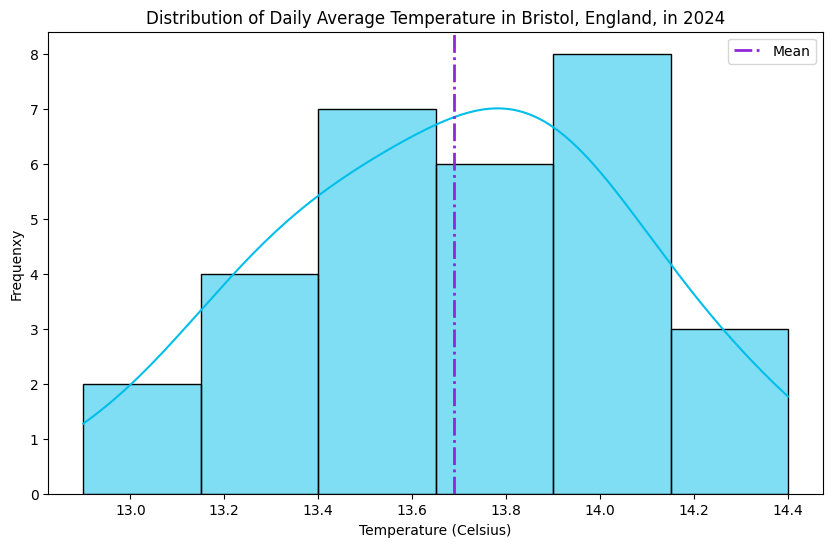

In [45]:
#Plot this using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(temperature_data,kde=True, color="#00BEEA")
plt.axvline(np.mean(temperature_data), color = "#9026D8", linestyle =  "-.", linewidth=2, label="Mean")
plt.title("Distribution of Daily Average Temperature in Bristol, England, in 2024")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Frequenxy")
plt.legend()
plt.show()

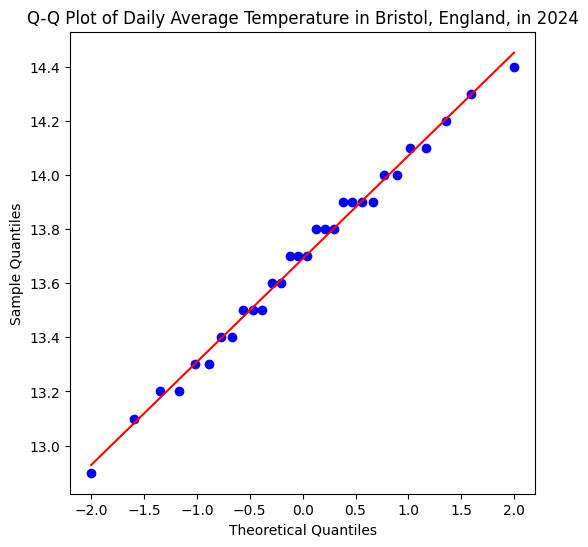

In [46]:
#Q-Q plot
plt.figure(figsize=(6, 6))
probplot(temperature_data,dist = "norm", plot = plt)
plt.title("Q-Q Plot of Daily Average Temperature in Bristol, England, in 2024")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [ ]:
np.random.seed(42)#Hitch Hikers guide to the galaxy reference!!
heart_rate = np.random.normal(loc=78, scale=2, size=30) 

print(heart_rate)

[78.99342831 77.7234714  79.29537708 81.04605971 77.53169325 77.53172609
 81.15842563 79.53486946 77.06105123 79.08512009 77.07316461 77.06854049
 78.48392454 74.17343951 74.55016433 76.87542494 75.97433776 78.62849467
 76.18395185 75.1753926  80.93129754 77.5484474  78.13505641 75.15050363
 76.91123455 78.22184518 75.69801285 78.75139604 76.79872262 77.4166125 ]


In [56]:
t_stat, p_val = stats.ttest_1samp(heart_rate, popmean = 80)

print(f"t Statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


t Statistic = -7.231, p-value = 0.000


t Statsistics = -5.000, p-value = 0.0005373336027564525


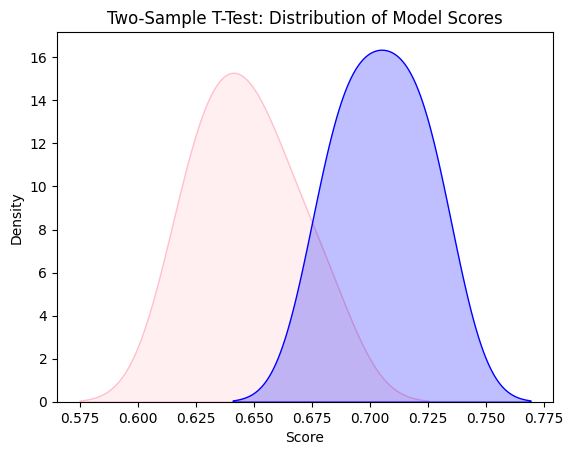

In [65]:
model_a = np.array([0.65, 0.63, 0.66, 0.68, 0.64, 0.62])
model_b = np.array([0.70, 0.72, 0.69, 0.71, 0.68, 0.73])

t_stat, p_val = stats.ttest_ind(model_a, model_b)
print (f"t Statsistics = { t_stat:.3f}, p-value = {p_val}")

sns.kdeplot(model_a, label="Model A", color="pink", fill= True)
sns.kdeplot(model_b, label="Model B", color="blue", fill= True)
plt.title("Two-Sample T-Test: Distribution of Model Scores")
plt.xlabel("Score")
plt.ylabel("Density")


plt.show()

t Statistics = 7.492, p-value = 2.91485501703812e-06


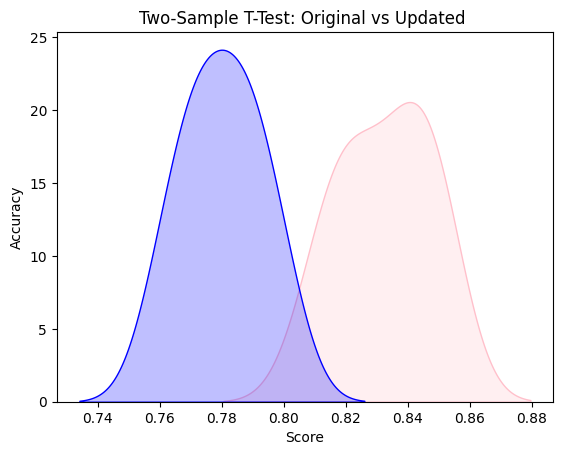

In [70]:
#You're working in a machine learning team to evaluate the performance of a
#recommendation system. You have 2 versions of the model: the original version
#(Model A) deployed on dataset 1, and an updated version (Model B) on dataset 2.

a_accuracy = [0.82, 0.85, 0.84, 0.81, 0.83, 0.82, 0.84, 0.85]
b_accuracy = [0.78, 0.79, 0.77, 0.76, 0.80, 0.79, 0.78, 0.77]

#Each model was tested on different datasets with similar characteristics and accuracy was recorded.
#Find out if there's a statistically significant difference in performance (or accuracy) between Model A
#and Model B using Python.

t_stat, p_val = stats.ttest_ind(a_accuracy, b_accuracy)
print (f"t Statistics = { t_stat:.3f}, p-value = {p_val}")

#Are they related or independent? (Which T-Test are you using?)
#What hypothesis are you testing?
    #Null hypothesis - they are the same
#Visualise the accuracy distributions for each model

sns.kdeplot(a_accuracy, label="Original System", color="pink", fill= True)
sns.kdeplot(b_accuracy, label="Updated System", color="blue", fill= True)
plt.title("Two-Sample T-Test: Original vs Updated ")
plt.xlabel("Score")
plt.ylabel("Accuracy")
plt.show()


plt.show()

t-statistic: 4.848449513665921
p-value: 0.00025800993827638114
Reject the null hypothesis: There is a significant difference in average accuracy between Model A and Model B.


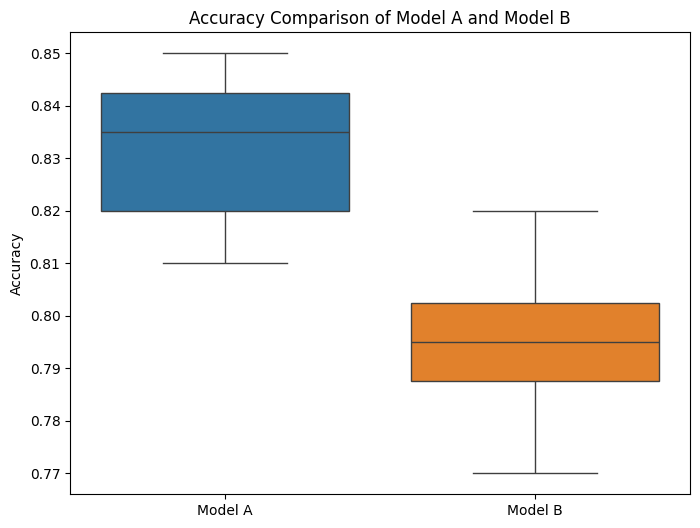

In [76]:
# Step 1: Conduct the two-sample t-test
t_stat, p_value =  stats.ttest_ind(a_accuracy, b_accuracy)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Step 2: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average accuracy between Model A and Model B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average accuracy between Model A and Model B.")

# Step 3:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[a_accuracy, b_accuracy])
plt.xticks([0, 1], ['Model A', 'Model B'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Model A and Model B')
plt.show()

0

In [ ]:
From scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
line_a_defects = np.random.normal(5, 1, 30)
line_b_defects = np.random.normal(5.5, 1} 30)
line_c_defects = np.random.normal(6, 1, 30)

#Create or import three arrays of normally distributed data ( or use np.random.normal)
#Call the SciPy function f_oneway(X, Y, Z)
f_stat, p_value = f_oneway(Dataset X, Dataset Y, Dataset Z)
#Define a significance (a)-level and interpret the p-value and f-statistic0
#Visualise the results using a box plot